In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.15.0


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

MODEL A - DANE BEZ PORY ROKU

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

dataset

In [ ]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1,activation='linear') 
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

In [ ]:
model.evaluate(x_test, y_test, batch_size=128)

In [ ]:
flow_time=np.arange(0,1,1/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


In [104]:
def build_and_compile_model_input_1():
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss="mse",
                    metrics=['mae'])
      return model

def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

Epoch 1/5
11088/11088 [==============================] - 10s 871us/step - loss: 0.8340 - mae: 0.1904
Epoch 2/5
11088/11088 [==============================] - 9s 848us/step - loss: 0.8291 - mae: 0.1861
Epoch 3/5
11088/11088 [==============================] - 9s 826us/step - loss: 0.8291 - mae: 0.1860
Epoch 4/5
11088/11088 [==============================] - 9s 840us/step - loss: 0.8291 - mae: 0.1860
Epoch 5/5
113/113 [==============================] - 0s 631us/step


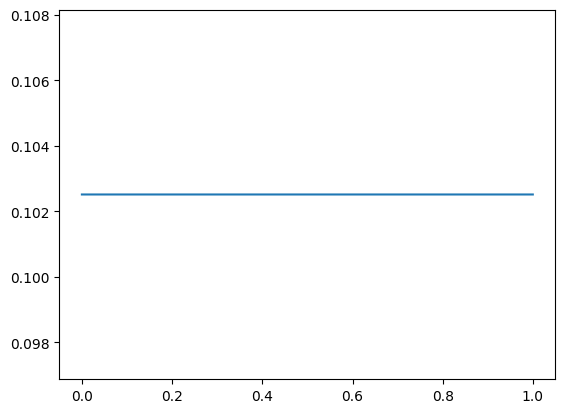

In [105]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pon=np.arange(0,1,1/3600) 
flow_result_pon = model.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(3600))

WTOREK

In [106]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_wt=np.arange(0,1,1/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(3600))

Epoch 1/5
 9887/11088 [=========================>....] - ETA: 1s - loss: 0.6302 - mae: 0.1537

ŚRODA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sr=np.arange(0,1,1/3600) 
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(3600))

CZWARTEK

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_czw=np.arange(0,1,1/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(3600))

PIĄTEK

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_pt=np.arange(0,1,1/3600) 
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(3600))

SOBOTA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_sob=np.arange(0,1,1/3600) 
flow_result_sob = model.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(3600))

NIEDZIELA

In [ ]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_1()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_dn=np.arange(0,1,1/3600) 
flow_result_dn = model.predict(flow_time_dn)   

plt.plot(flow_time_dn, flow_result_dn.reshape(3600))

NameError: name 'flow_time_sr' is not defined

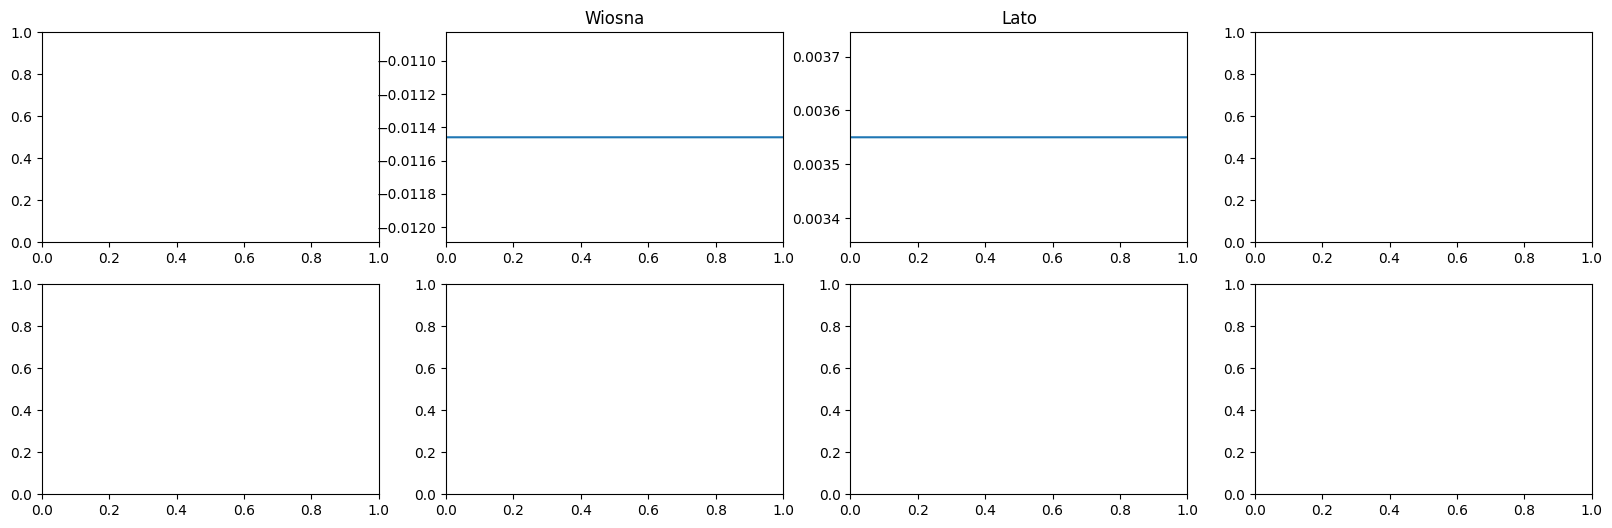

In [103]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 1)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 1)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Jesień')
axs[0,2].set_xlim(0, 1)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 1)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 1)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 1)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 1)

plt.tight_layout()

plt.show()

MODEL C - DODANIE PORY ROKU

In [78]:
def build_and_compile_model_input_3():
      model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1,activation='linear') 
      ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss="mse",
                    metrics=['mae'])
      return model

def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/5
77616/77616 [==============================] - 66s 840us/step - loss: 0.7050 - mae: 0.1649
Epoch 2/5
77616/77616 [==============================] - 66s 844us/step - loss: 0.7045 - mae: 0.1642
Epoch 3/5
77616/77616 [==============================] - 67s 858us/step - loss: 0.7045 - mae: 0.1642
Epoch 4/5
77616/77616 [==============================] - 68s 875us/step - loss: 0.7045 - mae: 0.1642
Epoch 5/5
113/113 [==============================] - 0s 621us/step


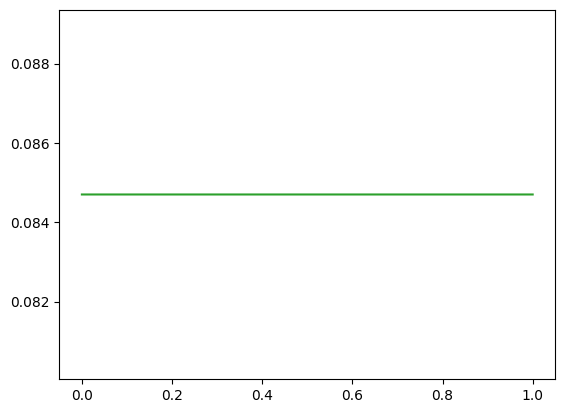

In [79]:
dataset = pd.read_csv('../dane_scalone.csv')


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input_3()

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss="mse",
              metrics=['mae'])

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time=np.arange(0,1,1/3600)
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/5
19404/19404 [==============================] - 18s 893us/step - loss: 0.7542 - mae: 0.1784
Epoch 2/5
19404/19404 [==============================] - 17s 859us/step - loss: 0.7512 - mae: 0.1752
Epoch 3/5
19404/19404 [==============================] - 17s 857us/step - loss: 0.7512 - mae: 0.1752
Epoch 4/5
19404/19404 [==============================] - 17s 854us/step - loss: 0.7512 - mae: 0.1752
Epoch 5/5
113/113 [==============================] - 0s 626us/step


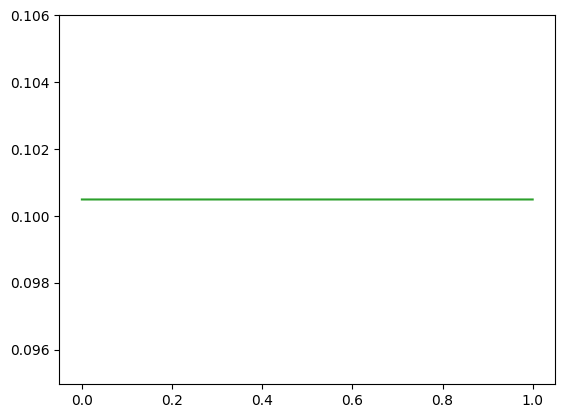

In [80]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_spring=np.arange(0,1,1/3600)
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring, dtype=int),1*np.ones_like(flow_time_spring, dtype=int),flow_time_spring)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring, flow_result_spring)

LATO

Epoch 1/5
19404/19404 [==============================] - 17s 851us/step - loss: 0.4860 - mae: 0.1332
Epoch 2/5
19404/19404 [==============================] - 16s 846us/step - loss: 0.4829 - mae: 0.1305
Epoch 3/5
19404/19404 [==============================] - 16s 843us/step - loss: 0.4829 - mae: 0.1305
Epoch 4/5
19404/19404 [==============================] - 16s 842us/step - loss: 0.4829 - mae: 0.1305
Epoch 5/5
113/113 [==============================] - 0s 592us/step


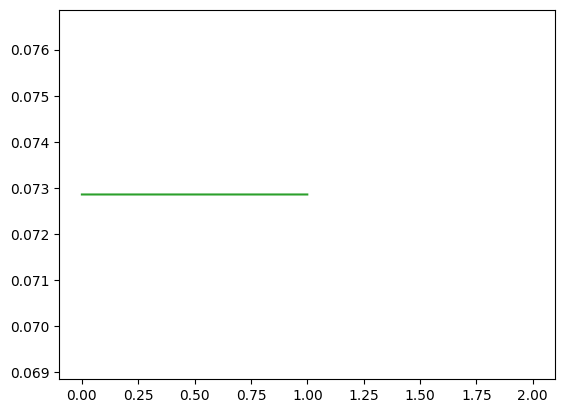

In [81]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_summer=np.arange(0,1,1/3600)
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer, dtype=int),1*np.ones_like(flow_time_summer, dtype=int),flow_time_summer)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer, flow_result_summer)

JESIEŃ

Epoch 1/5
19404/19404 [==============================] - 17s 842us/step - loss: 0.6855 - mae: 0.1634
Epoch 2/5
19404/19404 [==============================] - 16s 848us/step - loss: 0.6671 - mae: 0.1592
Epoch 3/5
19404/19404 [==============================] - 16s 835us/step - loss: 0.6671 - mae: 0.1592
Epoch 4/5
19404/19404 [==============================] - 16s 837us/step - loss: 0.6671 - mae: 0.1591
Epoch 5/5
113/113 [==============================] - 0s 663us/step


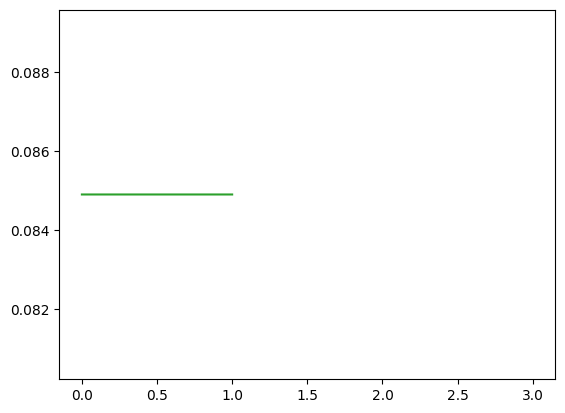

In [82]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_fall=np.arange(0,1,1/3600)
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall, dtype=int),1*np.ones_like(flow_time_fall, dtype=int),flow_time_fall)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall, flow_result_fall)

ZIMA

Epoch 1/5
19404/19404 [==============================] - 17s 837us/step - loss: 0.9413 - mae: 0.1974
Epoch 2/5
19404/19404 [==============================] - 16s 831us/step - loss: 0.9233 - mae: 0.1934
Epoch 3/5
19404/19404 [==============================] - 16s 837us/step - loss: 0.9234 - mae: 0.1933
Epoch 4/5
19404/19404 [==============================] - 16s 833us/step - loss: 0.9233 - mae: 0.1934
Epoch 5/5
113/113 [==============================] - 0s 601us/step


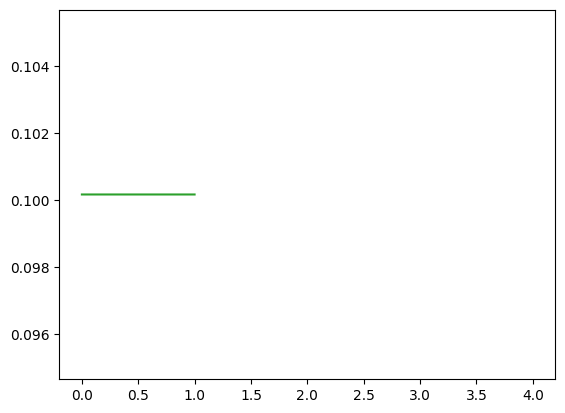

In [83]:
dataset = pd.read_csv('../dane_scalone.csv')

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input_3()

model.fit(x_train, y_train, epochs=5, batch_size=128)

flow_time_winter=np.arange(0,1,1/3600)
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter, dtype=int),1*np.ones_like(flow_time_winter, dtype=int),flow_time_winter)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter, flow_result_winter)

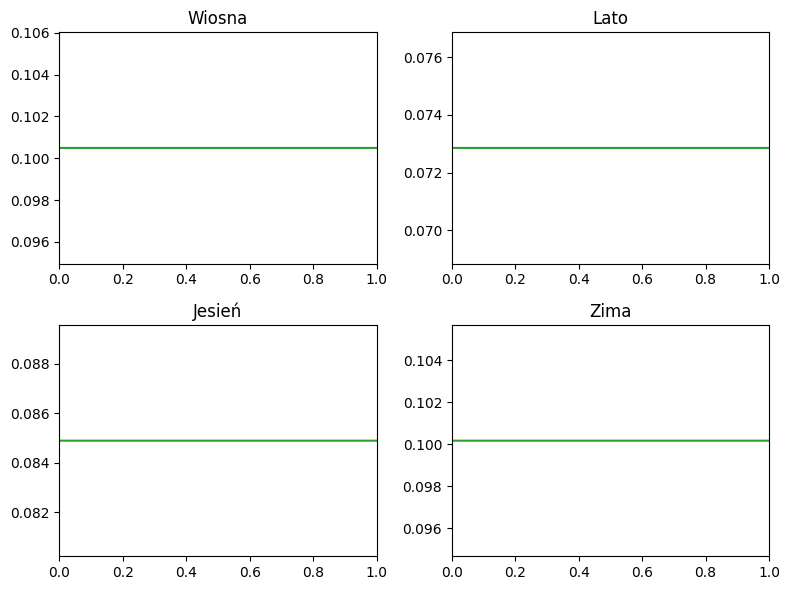

In [97]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 1)

axs[0,1].plot(flow_time_summer, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 1)

axs[1,0].plot(flow_time_fall, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 1)

axs[1,1].plot(flow_time_winter, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 1)

plt.tight_layout()

plt.show()